# Punto 5

Evaluar los modelos entrenados con embeddings preentrenados frente a embeddings entrenados desde cero. Compara el rendimiento en términos de precisión, recall y F1, y analiza las diferencias entre los modelos con embeddings preentrenados y los que fueron entrenados desde cero.

Esta implementación, genera cuatro gráficos de barras que comparan las métricas de rendimiento (accuracy, precision, recall, F1 score) de los modelos entrenados desde cero y los modelos que utilizan embeddings preentrenados. Se enfoca solo en los modelos con embeddings de tamaño 300, mostrando de manera visual las diferencias entre ambos enfoques.
Se genera un gráfico comparativo que visualiza el rendimiento de modelos de aprendizaje profundo utilizando dos enfoques diferentes: entrenamiento desde cero y entrenamiento con embeddings preentrenados. 

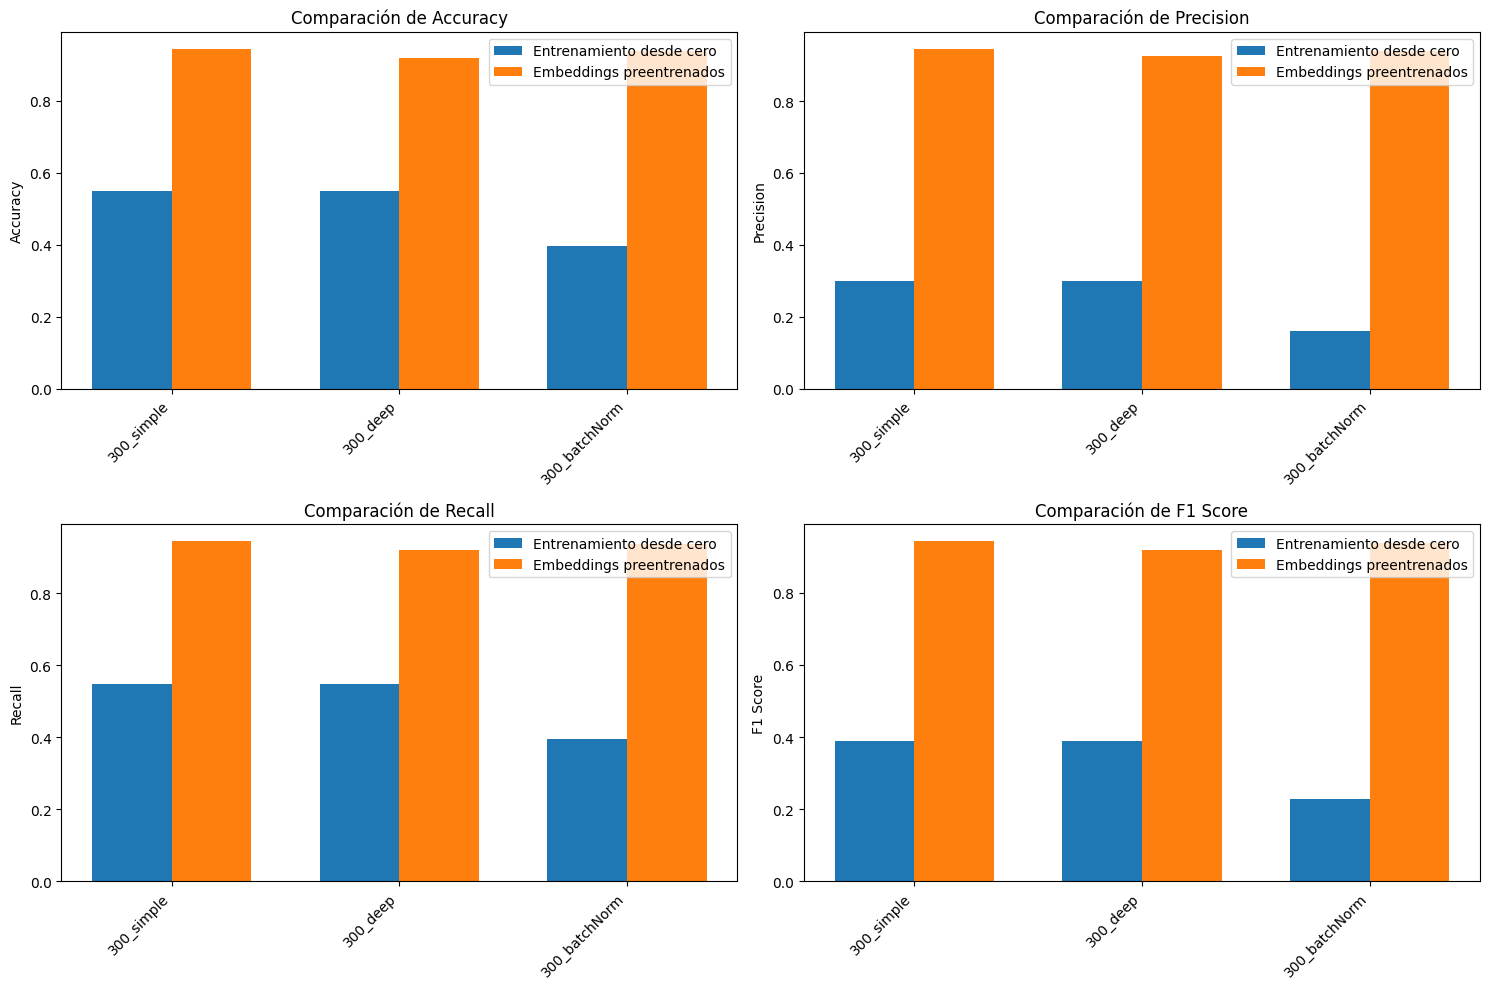

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Datos del punto 3 (entrenamiento desde cero)
results_point_3 = {
    '300_simple': [0.5479, 0.3003, 0.5479, 0.3879],
    '300_deep': [0.5479, 0.3003, 0.5479, 0.3879],
    '300_batchNorm': [0.3963, 0.1605, 0.3963, 0.2285],
    '400_simple': [0.5479, 0.3003, 0.5479, 0.3879],
    '400_deep': [0.5479, 0.3003, 0.5479, 0.3879],
    '400_batchNorm': [0.5511, 0.5277, 0.5511, 0.5387],
    '500_simple': [0.5479, 0.3003, 0.5479, 0.3879],
    '500_deep': [0.5479, 0.3003, 0.5479, 0.3879],
    '500_batchNorm': [0.5480, 0.5199, 0.5480, 0.5335],
}

# Datos del punto 4 (embeddings preentrenados)
results_point_4 = {
    '100_simple': [0.9012, 0.8768, 0.9012, 0.8870],
    '100_deep': [0.9074, 0.8825, 0.9074, 0.8932],
    '100_batchNorm': [0.8025, 0.8230, 0.8025, 0.7804],
    '200_simple': [0.9383, 0.9358, 0.9383, 0.9354],
    '200_deep': [0.9444, 0.9439, 0.9444, 0.9434],
    '200_batchNorm': [0.8951, 0.8777, 0.8951, 0.8800],
    '300_simple': [0.9444, 0.9454, 0.9444, 0.9431],
    '300_deep': [0.9198, 0.9246, 0.9198, 0.9198],
    '300_batchNorm': [0.9383, 0.9383, 0.9383, 0.9383],
}

# Crear un gráfico comparativo
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Métricas por índice
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    
    # Extraer las métricas de cada punto para los modelos de embeddings comunes (300)
    metric_index = i
    labels = ['300_simple', '300_deep', '300_batchNorm']  # Comparar solo los embeddings de tamaño 300
    
    # Valores de la métrica en ambos puntos
    point_3_values = [results_point_3[model][metric_index] for model in labels]
    point_4_values = [results_point_4[model][metric_index] for model in labels]

    # Graficar las barras
    x = np.arange(len(labels))
    width = 0.35
    ax.bar(x - width/2, point_3_values, width, label='Entrenamiento desde cero')
    ax.bar(x + width/2, point_4_values, width, label='Embeddings preentrenados')

    ax.set_ylabel(metric)
    ax.set_title(f'Comparación de {metric}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.legend()

fig.tight_layout()
plt.show()

A continuación, se comparan los resultados de modelos entrenados desde cero con modelos que utilizan embeddings preentrenados, mostrando la diferencia porcentual en rendimiento entre ambos enfoques.

In [11]:
# Datos del entrenamiento desde cero (punto 3)
data_train = {
    'Model': ['300_simple', '300_deep', '300_batchNorm'],
    'Accuracy_Train': [0.5479, 0.5479, 0.3963],
    'Precision_Train': [0.3003, 0.3003, 0.1605],
    'Recall_Train': [0.5479, 0.5479, 0.3963],
    'F1_Train': [0.3879, 0.3879, 0.2285]
}

# Datos de embeddings preentrenados (punto 4)
data_pretrained = {
    'Model': ['300_simple', '300_deep', '300_batchNorm'],
    'Accuracy_Pretrained': [0.9444, 0.9198, 0.9383],
    'Precision_Pretrained': [0.9454, 0.9246, 0.9383],
    'Recall_Pretrained': [0.9444, 0.9198, 0.9383],
    'F1_Pretrained': [0.9431, 0.9198, 0.9383]
}

# Crear dataframes
df_train = pd.DataFrame(data_train)
df_pretrained = pd.DataFrame(data_pretrained)

# Unir ambos dataframes en uno solo para comparar
df = pd.merge(df_train, df_pretrained, on='Model')

# Calcular la diferencia porcentual
df['Accuracy_Difference (%)'] = (df['Accuracy_Pretrained'] - df['Accuracy_Train']) / df['Accuracy_Train'] * 100
df['Precision_Difference (%)'] = (df['Precision_Pretrained'] - df['Precision_Train']) / df['Precision_Train'] * 100
df['Recall_Difference (%)'] = (df['Recall_Pretrained'] - df['Recall_Train']) / df['Recall_Train'] * 100
df['F1_Difference (%)'] = (df['F1_Pretrained'] - df['F1_Train']) / df['F1_Train'] * 100

# Mostrar el dataframe con las diferencias porcentuales
pd.DataFrame(df)

,Model,Accuracy_Train,Precision_Train,Recall_Train,F1_Train,Accuracy_Pretrained,Precision_Pretrained,Recall_Pretrained,F1_Pretrained,Accuracy_Difference (%),Precision_Difference (%),Recall_Difference (%),F1_Difference (%)
0,300_simple,0.5479,0.3003,0.5479,0.3879,0.9444,0.9454,0.9444,0.9431,72.367220,214.818515,72.367220,143.129673
1,300_deep,0.5479,0.3003,0.5479,0.3879,0.9198,0.9246,0.9198,0.9198,67.877350,207.892108,67.877350,137.122970
2,300_batchNorm,0.3963,0.1605,0.3963,0.2285,0.9383,0.9383,0.9383,0.9383,136.765077,484.610592,136.765077,310.634573


Finalmente, se calculan las diferencias porcentuales entre dos enfoques de modelos (entrenamiento desde cero y embeddings preentrenados) en términos de Accuracy, Precision, Recall y F1 Score, y luego muestra un DataFrame con solo esas diferencias para facilitar su análisis.

In [12]:
# Crear el DataFrame original
df = pd.DataFrame(df)

# Calcular las diferencias porcentuales
df['Accuracy_Difference (%)'] = (df['Accuracy_Pretrained'] - df['Accuracy_Train']) / df['Accuracy_Train'] * 100
df['Precision_Difference (%)'] = (df['Precision_Pretrained'] - df['Precision_Train']) / df['Precision_Train'] * 100
df['Recall_Difference (%)'] = (df['Recall_Pretrained'] - df['Recall_Train']) / df['Recall_Train'] * 100
df['F1_Difference (%)'] = (df['F1_Pretrained'] - df['F1_Train']) / df['F1_Train'] * 100

# Crear un dataframe solo con las diferencias porcentuales
df_differences = df[['Model', 'Accuracy_Difference (%)', 'Precision_Difference (%)', 'Recall_Difference (%)', 'F1_Difference (%)']]

# Mostrar el DataFrame
df_differences

,Model,Accuracy_Difference (%),Precision_Difference (%),Recall_Difference (%),F1_Difference (%)
0,300_simple,72.367220,214.818515,72.367220,143.129673
1,300_deep,67.877350,207.892108,67.877350,137.122970
2,300_batchNorm,136.765077,484.610592,136.765077,310.634573
